# Candy Exploration

### Contribution Report


<i>1. Johnny Powell completed parts 4 and 5</i>

<i>2. Madisen LeShoure completed parts 1 and 2</i>

<i>3. Jeevan Rathakrishnan completed part 3</i>

## Introduction

Motivation: We were curious about what candy is the best.
Research Question: to determine the best candy, what variable influences the win percent the most?

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import math
df = pd.read_csv("candy-data.csv")
def make_boolean(var, true_condition):
    # Creates a boolean variable
    # True is recorded when the true_condition holds
    return (var == true_condition)
df['chocolate'] = make_boolean(df['chocolate'], 1)
df['fruity'] = make_boolean(df['fruity'], 1)
df['caramel'] = make_boolean(df['caramel'], 1)
df['peanutyalmondy'] = make_boolean(df['peanutyalmondy'], 1)
df['nougat'] = make_boolean(df['nougat'], 1)
df['crispedricewafer'] = make_boolean(df['crispedricewafer'], 1)
df['hard'] = make_boolean(df['hard'], 1)
df['bar'] = make_boolean(df['bar'], 1)
df['pluribus'] = make_boolean(df['pluribus'], 1)
df

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,True,False,True,False,False,True,False,True,False,0.732,0.860,66.971725
1,3 Musketeers,True,False,False,False,True,False,False,True,False,0.604,0.511,67.602936
2,One dime,False,False,False,False,False,False,False,False,False,0.011,0.116,32.261086
3,One quarter,False,False,False,False,False,False,False,False,False,0.011,0.511,46.116505
4,Air Heads,False,True,False,False,False,False,False,False,False,0.906,0.511,52.341465
...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,Twizzlers,False,True,False,False,False,False,False,False,False,0.220,0.116,45.466282
81,Warheads,False,True,False,False,False,False,True,False,False,0.093,0.116,39.011898
82,Welch's Fruit Snacks,False,True,False,False,False,False,False,False,True,0.313,0.313,44.375519
83,Werther's Original Caramel,False,False,True,False,False,False,True,False,False,0.186,0.267,41.904308


## Dataset Discussion

We found The Ultimate Halloween Candy Power Ranking dataset from the provided dataset options in the project description document. We discovered our dataset on the fivethirtyeight github. Link = (https://github.com/fivethirtyeight/data/tree/master/candy-power-ranking). We accessed the dataset on September 22, 2024. The codebook for the dataset is available, it provides descriptions for each attribute included in the dataset, what the binary variables are and how they are defined, and a video detailing how and why the dataset was created.

For Halloween Fivethirtyeight wanted to find out what the best candy was to give out for the holiday. To do this they placed 86 different candies into a online matchup game where 250,000 participants responded which candy was their favorite or preferred candy out of the matchups. For each participant there was a total of 43 total matchups. Our dataset reflects how each candy performed in the matchups of all 250,000 responses.

In [2]:
df.head(10)

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,True,False,True,False,False,True,False,True,False,0.732,0.860,66.971725
1,3 Musketeers,True,False,False,False,True,False,False,True,False,0.604,0.511,67.602936
2,One dime,False,False,False,False,False,False,False,False,False,0.011,0.116,32.261086
3,One quarter,False,False,False,False,False,False,False,False,False,0.011,0.511,46.116505
4,Air Heads,False,True,False,False,False,False,False,False,False,0.906,0.511,52.341465
5,Almond Joy,True,False,False,True,False,False,False,True,False,0.465,0.767,50.347546
6,Baby Ruth,True,False,True,True,True,False,False,True,False,0.604,0.767,56.914547
7,Boston Baked Beans,False,False,False,True,False,False,False,False,True,0.313,0.511,23.417824
8,Candy Corn,False,False,False,False,False,False,False,False,True,0.906,0.325,38.010963
9,Caramel Apple Pops,False,True,True,False,False,False,False,False,False,0.604,0.325,34.517681


In [3]:
print(df.shape)

(85, 13)


The unit of observation in this dataset is each individual type of candy. Each row in the dataset represents a different candy, with various attributes (such as whether it contains chocolate, whether it is fruity, its sugar percentile, etc.) being observed and recorded for that particular candy. 

For our analysis we will focus on the following two variables from the dataset:

    Quantitative Variable: "winpercent"
        Definition: This variable represents the overall win percentage of a candy according to 269,000 matchups. It quantifies how often a particular candy was preferred over others in head-to-head matchups.
        Reason for Selection: The "winpercent" variable provides a direct measure of a candy's popularity or appeal, making it an interesting variable to analyze in relation to other factors like price or specific ingredients.

    Categorical Variable: "chocolate"
        Definition: This is a binary variable where 1 indicates that the candy contains chocolate, and 0 indicates that it does not.
        Reason for Selection: Chocolate is a key ingredient in many popular candies, and exploring the ingredient in relation to the candy's win percentage can reveal insights into how chocolate influences candy preferences.

Missing Contextual Factors:

    The dataset does not include demographic information about the participants who took part in the 269,000 matchups. Information such as age, geographic location, or cultural background could provide valuable context for understanding why certain candies are more popular. Without this, the data might reflect preferences specific to a particular group rather than a general consensus.

## Dataset Cleaning

In [4]:
df.isna().sum()

competitorname      0
chocolate           0
fruity              0
caramel             0
peanutyalmondy      0
nougat              0
crispedricewafer    0
hard                0
bar                 0
pluribus            0
sugarpercent        0
pricepercent        0
winpercent          0
dtype: int64

In [5]:
df['sugarpercent'].unique()  # Checking for implicit missing values

array([0.73199999, 0.60399997, 0.011     , 0.90600002, 0.465     ,
       0.31299999, 0.046     , 0.127     , 0.43000001, 0.093     ,
       0.197     , 0.22      , 0.26699999, 0.82499999, 0.87199998,
       0.30199999, 0.96499997, 0.84799999, 0.59299999, 0.58099997,
       0.034     , 0.72000003, 0.40599999, 0.98799998, 0.86000001,
       0.94099998, 0.546     , 0.069     , 0.15099999, 0.56900001,
       0.41800001, 0.162     , 0.17399999, 0.186     ])

In [6]:
df['pricepercent'].unique() # Checking for implicit missing values

array([0.86000001, 0.51099998, 0.116     , 0.76700002, 0.32499999,
       0.034     , 0.45300001, 0.465     , 0.093     , 0.91799998,
       0.104     , 0.27900001, 0.65100002, 0.44100001, 0.97600001,
       0.023     , 0.83700001, 0.96499997, 0.069     , 0.081     ,
       0.22      , 0.058     , 0.755     , 0.011     , 0.255     ,
       0.90600002, 0.31299999, 0.26699999, 0.84799999])

In [7]:
df['winpercent'].unique()  # Checking for implicit missing values

array([66.971725, 67.602936, 32.261086, 46.116505, 52.341465, 50.347546,
       56.914547, 23.417824, 38.010963, 34.517681, 38.975037, 36.017628,
       24.524988, 42.272076, 39.460556, 43.088924, 39.185505, 46.783348,
       57.11974 , 34.158958, 51.41243 , 42.178772, 55.375454, 62.284481,
       56.490501, 59.236122, 28.127439, 57.21925 , 76.7686  , 41.389557,
       39.141056, 52.911392, 71.46505 , 66.574585, 46.411716, 55.064072,
       73.099556, 60.800701, 64.35334 , 47.829754, 54.526451, 55.354046,
       70.735641, 66.47068 , 22.445341, 39.4468  , 46.296597, 69.483788,
       37.722336, 41.265511, 37.348522, 81.866257, 84.18029 , 73.43499 ,
       72.887901, 35.290756, 65.716286, 29.703691, 42.849144, 34.722   ,
       63.08514 , 55.103695, 37.887188, 45.995827, 76.673782, 59.529251,
       59.863998, 52.825947, 67.037628, 34.578991, 33.43755 , 32.230995,
       27.303865, 54.861111, 48.982651, 43.068897, 45.736748, 49.653503,
       47.173229, 81.642914, 45.466282, 39.011898, 

# As seen above there are no null values in the data.
Additionally, there are no implicit missing values such as -1 or 999 that need to be converted into missing values.
Ultimately, we have no explicit or implicit missing values, therefor we cannot drop any missing values.

In [8]:
df['competitorname'].unique()

array(['100 Grand', '3 Musketeers', 'One dime', 'One quarter',
       'Air Heads', 'Almond Joy', 'Baby Ruth', 'Boston Baked Beans',
       'Candy Corn', 'Caramel Apple Pops', 'Charleston Chew',
       'Chewey Lemonhead Fruit Mix', 'Chiclets', 'Dots', 'Dum Dums',
       'Fruit Chews', 'Fun Dip', 'Gobstopper', 'Haribo Gold Bears',
       'Haribo Happy Cola', 'Haribo Sour Bears', 'Haribo Twin Snakes',
       "Hershey's Kisses", "Hershey's Krackel",
       "Hershey's Milk Chocolate", "Hershey's Special Dark", 'Jawbusters',
       'Junior Mints', 'Kit Kat', 'Laffy Taffy', 'Lemonhead',
       'Lifesavers big ring gummies', "Peanut butter M&M's", "M&M's",
       'Mike & Ike', 'Milk Duds', 'Milky Way', 'Milky Way Midnight',
       'Milky Way Simply Caramel', 'Mounds', 'Mr Good Bar', 'Nerds',
       'Nestle Butterfinger', 'Nestle Crunch', 'Nik L Nip', 'Now & Later',
       'Payday', 'Peanut M&Ms', 'Pixie Sticks', 'Pop Rocks', 'Red vines',
       "Reese's Miniatures", "Reese's Peanut Butter cup"

In [9]:
df['competitorname'].value_counts()

competitorname
100 Grand                     1
3 Musketeers                  1
One dime                      1
One quarter                   1
Air Heads                     1
                             ..
Twizzlers                     1
Warheads                      1
Welch's Fruit Snacks          1
Werther's Original Caramel    1
Whoppers                      1
Name: count, Length: 85, dtype: int64

Since each entry represents the name of a candy they are all unique by design. 
Therefore we do not need to combine any uncommon values.


<function matplotlib.pyplot.show(close=None, block=None)>

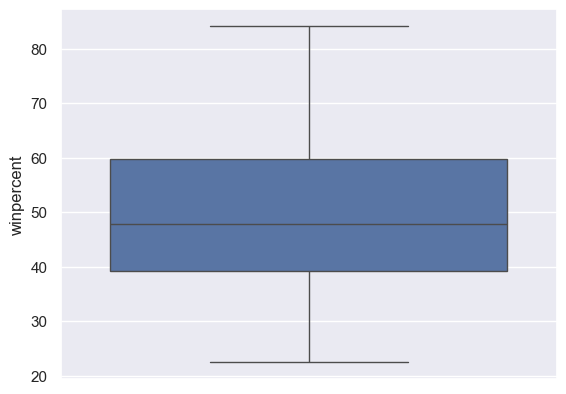

In [10]:
sns.boxplot(y = df['winpercent'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

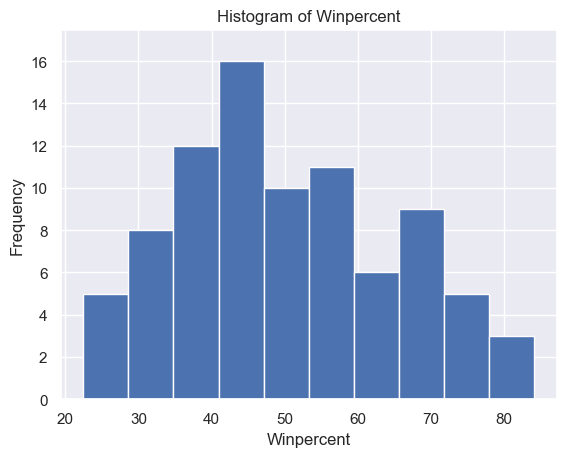

In [11]:
df['winpercent'].plot.hist(bins = 10)
plt.title('Histogram of Winpercent')
plt.xlabel('Winpercent')
plt.ylim(0,17.5)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

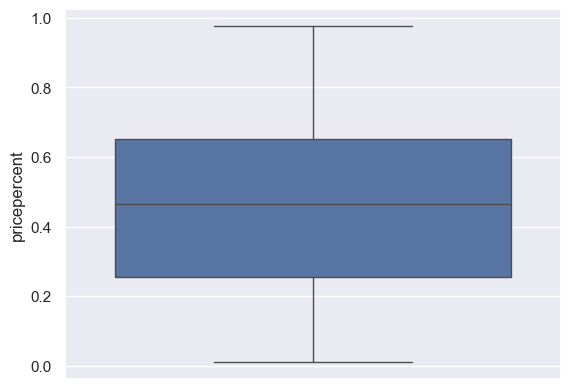

In [12]:
sns.boxplot(y = df['pricepercent'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

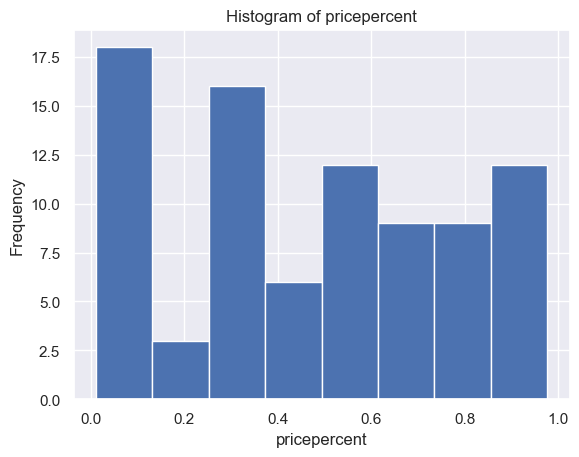

In [13]:
df['pricepercent'].plot.hist(bins = 8)
plt.title('Histogram of pricepercent')
plt.xlabel('pricepercent')
#plt.ylim(0,17.5)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

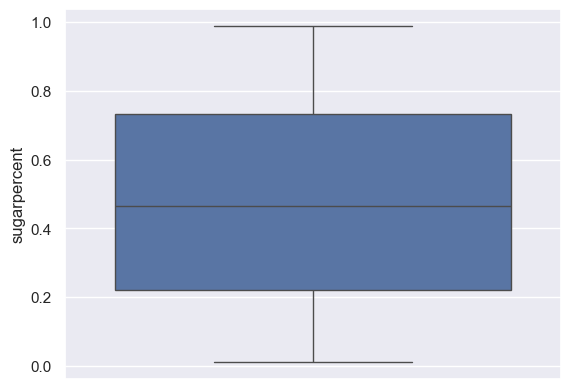

In [14]:
sns.boxplot(y = df['sugarpercent'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

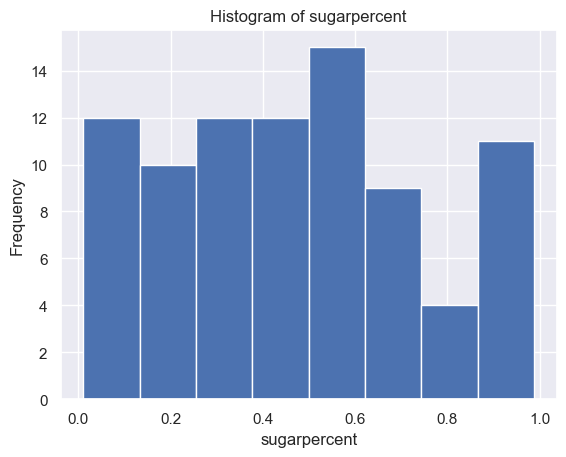

In [15]:
df['sugarpercent'].plot.hist(bins = 8)
plt.title('Histogram of sugarpercent')
plt.xlabel('sugarpercent')
plt.show

In [16]:
# From the distributions of the quantitative variables above, we can see that there are no values that are concerning.
# The 'sugarpercent' distribution is slighly right skewed with most of the values below 0.8, but there are no outliers present.
# The 'pricepercent' distribution seems to be somewhat uniform with no clear outliers seen.
# The 'Winpercent' distribution looks normal with no extreme deviations.
# Based off of the distributions above, there are no concerning observations found. Therefore, I won't drop any observations for these variables.
# Overall, the dataset was well prepared for analysis (no missing values / uncommon values) so no further cleaning was necessary.

## Summarizing Data

What is the relationship between chocolate and win percentage?
Apart from that, what is the relationship between any of the other boolean values and win percentage? What is the most common boolean value shared amongst the winners? The losers?

39 Winners, 46 Losers
competitorname      Reese's Peanut Butter cupReese's MiniaturesTwi...
chocolate                                                          28
fruity                                                             11
caramel                                                            10
peanutyalmondy                                                     12
nougat                                                              5
crispedricewafer                                                    6
hard                                                                1
bar                                                                17
pluribus                                                           17
sugarpercent                                                   20.838
pricepercent                                                   22.634
winpercent                                                2479.633289
dtype: object competitorname      Tootsie Roll Snack BarsWhoppersToo

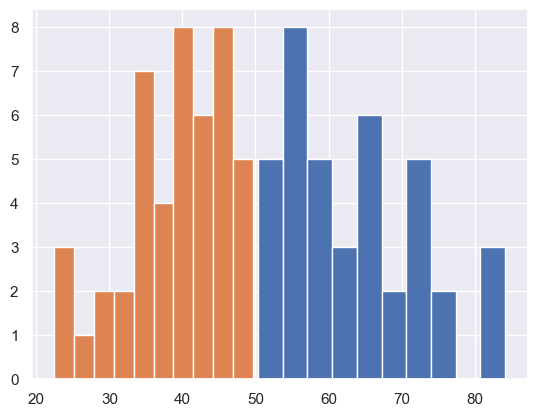

In [17]:
df = df.nlargest(85, "winpercent")
winners = df[df.winpercent > 50]
losers = df[df.winpercent <= 50]
print(f"{len(winners)} Winners, {len(losers)} Losers")
winner_count = winners.sum()
loser_count = losers.sum()
print(winner_count, loser_count)
winners["winpercent"].hist()
losers["winpercent"].hist()
print(f"The chance of a winner being chocolate is {winners["chocolate"].sum()/len(winners)}, while the chance of a loser being chocolate is {losers["chocolate"].sum()/len(losers)}")

<Axes: >

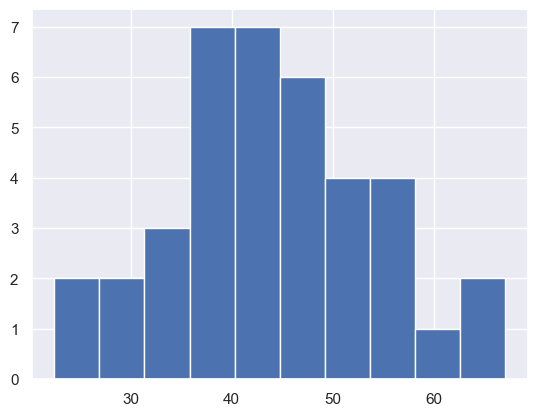

In [18]:
df[df["fruity"] == True]["winpercent"].hist()

<Axes: >

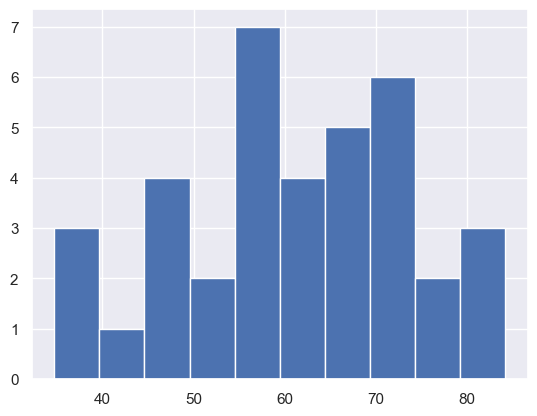

In [19]:
df[df["chocolate"] == True]["winpercent"].hist()
#This will show a clear lean towards the winning percentages. Stats have shown that chocolate is indeed popular.

<Axes: >

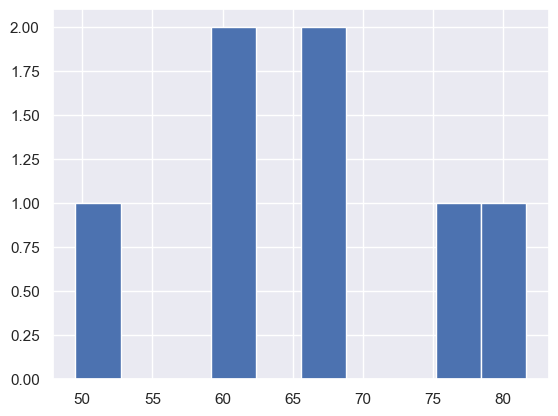

In [20]:
df[df["crispedricewafer"] == True]["winpercent"].hist()

<Axes: >

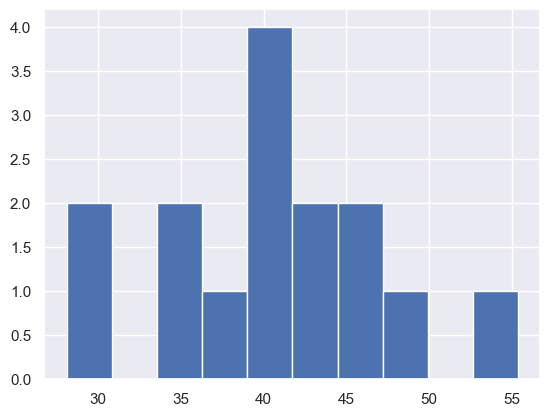

In [21]:
df[df["hard"] == True]["winpercent"].hist()

In [22]:
proportions = pd.DataFrame({"proportion of winners": [float(winners["chocolate"].sum()/len(winners)), float(winners["fruity"].sum()/len(winners)), float(winners["caramel"].sum()/len(winners)), float(winners["peanutyalmondy"].sum()/len(winners)), float(winners["nougat"].sum()/len(winners)), float(winners["crispedricewafer"].sum()/len(winners)), float(winners["hard"].sum()/len(winners)), float(winners["bar"].sum()/len(winners)), float(winners["pluribus"].sum()/len(winners))], "proportion of losers": [float(losers["chocolate"].sum()/len(losers)), float(losers["fruity"].sum()/len(losers)), float(losers["caramel"].sum()/len(losers)), float(losers["peanutyalmondy"].sum()/len(losers)), float(losers["nougat"].sum()/len(losers)), float(losers["crispedricewafer"].sum()/len(losers)), float(losers["hard"].sum()/len(losers)), float(losers["bar"].sum()/len(losers)), float(losers["pluribus"].sum()/len(losers))]}, index = ["chocolate", "fruity", "caramel", "peanuty/almondy", "nougat", "crisped rice wafer", "hard", "bar", "pluribus"])
proportions["win/loss ratio"] = proportions["proportion of winners"]/proportions["proportion of losers"]
proportions

,proportion of winners,proportion of losers,win/loss ratio
chocolate,0.717949,0.195652,3.669516
fruity,0.282051,0.586957,0.480532
caramel,0.256410,0.086957,2.948718
peanuty/almondy,0.307692,0.043478,7.076923
nougat,0.128205,0.043478,2.948718
crisped rice wafer,0.153846,0.021739,7.076923
hard,0.025641,0.304348,0.084249
bar,0.435897,0.086957,5.012821
pluribus,0.435897,0.586957,0.742640


Through the graphs, we were able to observe a visual difference in the win percentage for each of the winning candies and the losing candies. The distribution of win percentages for each different categorical variable is around the same, and while chocolate is a majority-popular candy, it is popular for manufacturers of good and bad candy, so it has the widest win percentage range. while the table showed the proportions of which types of candies were on which side, and the ratio of which candies appeared on the winning side per the number of times they were on the losing side. These summaries all provide insight into how the likelihood of winning would be affected by what type/types of candy that a competitor might be.

The more extreme-tending variables seem to be chocolate (highest proportion of winners), fruity (tied for highest proportion of losers), pluribus (closest to 1.0 win/loss ratio and tied with fruity for largest loss proportion), and "hard" for the highest win rate. While these factors do not mess with the data or bring it to question, it is interesting to consider the patterns displayed in these variables. The two most popular candy types were not chocolate, but in fact "peanuty/almondy" and "crisped rice wafer", with "bar" in third place. If I were to guess why I would say it is because they are more particular of a type, but it could even have to do with outside factors or random chance why they were more popular. 

## Any other type of analysis/question you want to explore with this dataset.

<u>Why?</u>: Sometimes undergraduate students will put the research projects that they did for their classes on their resumes when applying for graduate schools, internships, and jobs. If you're interested in showcasing cool analyses to write on your resume, this section could help with that. **(This section is not worth any points though).**

## Conclusion

After looking at statistics and distributions from the dataset, we found that the dataset was clean. There were no missing values or significant outliers in the quantitative variables. Additionally, we found no uncommon categorical values so no rows were dropped. The unit of observation is each type of candy, with "winpercent" as the quantitative variable and "chocolate" as the categorical variable. Key limitations include the lack of demographic context and scopes of variables, marketing influence, which may affect the interpretation of candy preferences in our data set. I think this dataset could be very useful for any company making these candies or anyone interested in the popularities of candies, so they can understand what is popular and what isn't. The categories can even help them understand what types of candy have been working the best and what types have not.

The visual graphics show that the candy types tend to stay in their own ranges for win percentage, and the histograms along with the proportion table shows visually and numerically how much more popular each candy type is. Chocolate is clearly the most popular 